In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the data frame and add the meta data to the segments
data = pd.read_parquet(Path('data/datasets/chu_dataset/cases/'))
data['label_id'] = data['label_id'].astype(str) + "_" + data['caseid'].astype(str)

#get columns name with _0 and rename them with _10
data = data.rename(columns={col: col.replace('_0', '_10') for col in data.columns if '_0' in col})

static = pd.read_parquet('data/datasets/chu_dataset/meta.parquet')

data_chu = data.merge(static, on='caseid')

In [3]:
dataset_name = '30_s_dataset'

data = pd.read_parquet(Path(f'data/datasets/{dataset_name}/cases/'))
data['label_id'] = data['label_id'].astype(str) + "_" + data['caseid'].astype(str)

static = pd.read_parquet(f'data/datasets/{dataset_name}/meta.parquet')

data_vdb = data.merge(static, on='caseid')


In [4]:

print(f"Number of cases in the vdb dataset:  {len(data_vdb['caseid'].unique())}")
print(f"Number of cases in the test set:  {len(data_vdb[data_vdb['split']=='test'].caseid.unique())}")
print(f"Number of cases in the train set:  {len(data_vdb[data_vdb['split']=='train'].caseid.unique())}")

Number of cases in the vdb dataset:  2121
Number of cases in the test set:  637
Number of cases in the train set:  1484


In [5]:
# compute the number of cases in vitaldb that include at least one positive label
print(f"Number of cases in the vdb dataset that include at least one positive label:  {len(data_vdb[data_vdb['label']==1].caseid.unique())}")
print(f"This is {len(data_vdb[data_vdb['label']==1].caseid.unique())/len(data_vdb['caseid'].unique())*100:.2f}% of the cases in the dataset")
print(f"Prevalence of positive labels in the vdb dataset:  {len(data_vdb[data_vdb['label']==1])/len(data_vdb):.2%}")

print(f"Number total of segment: {len(data_vdb)}, prevalaence: {data_vdb.label.mean():.2%}")
print(f"Number of segment in the test set: {len(data_vdb[data_vdb['split']=='test'])}, prevalaence: {data_vdb[data_vdb['split']=='test'].label.mean():.2%}")
print(f"Number of segment in the train set: {len(data_vdb[data_vdb['split']=='train'])}, prevalaence: {data_vdb[data_vdb['split']=='train'].label.mean():.2%}")


Number of cases in the vdb dataset that include at least one positive label:  1341
This is 63.22% of the cases in the dataset
Prevalence of positive labels in the vdb dataset:  6.47%
Number total of segment: 581417, prevalaence: 6.47%
Number of segment in the test set: 173038, prevalaence: 6.88%
Number of segment in the train set: 408379, prevalaence: 6.30%


In [6]:
print(f'Total number of patient in the CHU dataset: {len(data_chu["caseid"].unique())}')
print(f'Total number of segements in the CHU dataset: {len(data_chu)}')
print('\n')
# compute the number of cases in vitaldb that include at least one positive label
print(f"Number of cases in the chu dataset that include at least one positive label:  {len(data_chu[data_chu['label']==1].caseid.unique())}")
print(f"This is {len(data_chu[data_chu['label']==1].caseid.unique())/len(data_chu['caseid'].unique())*100:.2f}% of the cases in the dataset")
print(f"Prevalence of positive labels in the chu dataset:  {len(data_chu[data_chu['label']==1])/len(data_chu):.2%}")

print(f"Number of cases in the dataset: {len(data_chu['caseid'].unique())}")

Total number of patient in the CHU dataset: 545
Total number of segements in the CHU dataset: 71707


Number of cases in the chu dataset that include at least one positive label:  508
This is 93.21% of the cases in the dataset
Prevalence of positive labels in the chu dataset:  21.79%
Number of cases in the dataset: 545


In [7]:
# compare both data set

info_chu = data_chu.describe()

info_vdb = data_vdb.describe()

info_all = pd.concat((info_chu, info_vdb))

info_all.drop(columns=[col for col in info_all.columns if 'std' in col])

,mbp_constant_60,mbp_slope_60,sbp_constant_60,sbp_slope_60,dbp_constant_60,dbp_slope_60,hr_constant_60,hr_slope_60,rr_constant_60,rr_slope_60,...,time,time_before_IOH,age,height,weight,bmi,asa,caseid,preop_cr,preop_htn
count,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,71707.000000,...,71707,15628.000000,71707.000000,70370.000000,71707.000000,70370.000000,69683.000000,NaN,NaN,NaN
mean,80.395340,-0.113531,111.967712,-0.203559,62.454174,-0.076216,60.035965,0.009670,14.288528,0.005049,...,0 days 02:15:22.160597989,358.932685,66.023959,169.840074,78.007992,26.851305,3.003746,NaN,NaN,NaN
std,11.928573,2.962862,22.886898,4.773522,11.854853,3.870855,32.920559,14.768501,5.490018,1.860100,...,0 days 01:45:57.316915480,138.121162,10.674518,7.970899,14.309996,4.490540,0.485607,NaN,NaN,NaN
min,-17.598124,-82.209801,-93.884064,-162.957169,-138.566544,-193.566544,-163.000000,-163.000000,-37.166439,-37.166439,...,0 days 00:09:30,150.000000,22.000000,145.000000,42.000000,16.412069,1.000000,NaN,NaN,NaN
25%,71.980385,-1.034774,98.433117,-1.583253,56.000000,-0.814584,52.050821,-0.705380,14.000000,0.000000,...,0 days 01:16:00,240.000000,59.000000,165.000000,68.000000,23.738662,3.000000,NaN,NaN,NaN
50%,78.000000,-0.015402,108.281013,-0.114648,61.250988,-0.009887,62.000000,0.000000,15.000000,0.000000,...,0 days 01:50:00,360.000000,67.000000,171.000000,76.000000,26.297578,3.000000,NaN,NaN,NaN
75%,86.021152,0.697134,121.261711,0.978714,67.873055,0.623139,74.991402,0.621163,17.000000,0.000000,...,0 days 02:37:00,480.000000,74.000000,175.000000,87.000000,29.387755,3.000000,NaN,NaN,NaN
max,204.019943,66.865715,1158.714233,154.917862,437.491577,188.925034,304.550476,149.977325,76.873474,38.436737,...,0 days 16:41:00,600.000000,93.000000,195.000000,135.000000,49.444247,5.000000,NaN,NaN,NaN
count,581417.000000,581417.000000,581417.000000,581417.000000,581417.000000,581417.000000,581417.000000,581417.000000,581417.000000,581417.000000,...,581417,37621.000000,581417.000000,NaN,NaN,581417.000000,581417.000000,581417.000000,581417.000000,581417.000000
mean,85.720810,-0.019800,119.852829,-0.027796,65.518730,-0.016510,69.260612,-0.004406,14.130763,0.003416,...,0 days 02:13:11.269618879,362.641078,60.397761,NaN,NaN,23.267071,1.866007,3169.423180,0.888822,0.324053


In [8]:
bin_widths = {'mbp_constant_30': 1,
             'hr_constant_30': 1,
             'spo2_constant_30': 0.5,
             'rr_constant_30': 1,
             'sbp_constant_30': 1,
             'dbp_constant_30': 1,
             'etco2_constant_30': 1,
             'mac_constant_30': 0.2,
             'pp_ct_constant_30': 0.5}


for col in data_chu.columns:
    if col not in bin_widths:
        continue
    plt.figure()
    bin_width = bin_widths[col]
    min_val = min(data_chu[col].min(), data_vdb[col].min())
    max_val = max(data_chu[col].max(), data_vdb[col].max())
    bins = np.arange(min_val, max_val + bin_width, bin_width)
    # bins=111
    data_chu[col].hist(bins=bins, alpha=0.5, label='chu', density=True)
    data_vdb[col].hist(bins=bins, alpha=0.5, label='vdb', density=True)

    plt.legend()
    plt.title(col)


In [9]:
data_chu_raw = pd.read_parquet(Path('data/cases_chu/'))
data_chu_raw.Time = pd.to_timedelta(data_chu_raw.Time, unit="s")
data_vdb_raw = pd.read_parquet(Path('data/cases/'))

# data_vdb_raw = data_vdb_raw[data_vdb_raw.caseid.isin(data_vdb.caseid)]
data_vdb_raw = data_vdb_raw.rename(columns={    "Solar8000/ART_MBP": "mbp",
    "Solar8000/ART_SBP": "sbp",
    "Solar8000/ART_DBP": "dbp",
    "Solar8000/HR": "hr",
    "Solar8000/RR": "rr",
    "Solar8000/PLETH_SPO2": "spo2",
    "Solar8000/ETCO2": "etco2",
    "Orchestra/PPF20_CT": "pp_ct",
    "Primus/MAC": "mac",})
data_vdb_raw.Time = pd.to_timedelta(data_vdb_raw.Time, unit="s")
# data_vdb_raw.set_index(["caseid", "Time"], inplace=True)


# data_vdb_raw.sort_index(inplace=True)

In [10]:
# get the mean duration of the vdb dataset
# duration is defined as the max Time for each caseid
# Time in the second level index
print("VitalDB")
print(f"Median duration {data_vdb_raw.groupby('caseid').Time.max().median()} [{data_vdb_raw.groupby('caseid').Time.max().quantile(0.25)}-{data_vdb_raw.groupby('caseid').Time.max().quantile(0.75)}]")

print("Chu")
print(f"Meadian duration {data_chu_raw.groupby('caseid').Time.max().median()} [{data_chu_raw.groupby('caseid').Time.max().quantile(0.25)}-{data_chu_raw.groupby('caseid').Time.max().quantile(0.75)}]")

VitalDB
Median duration 0 days 03:12:59 [0 days 02:16:52-0 days 04:13:46]
Chu
Meadian duration 0 days 02:48:30 [0 days 02:20:00-0 days 03:35:30]


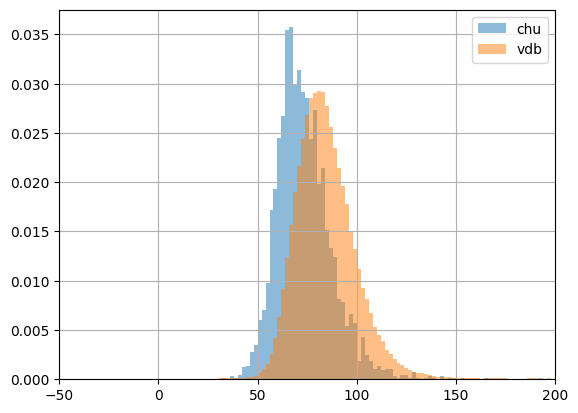

In [11]:
bin_width = 2
bins = np.arange(data_vdb_raw['mbp'].min(), data_vdb_raw['mbp'].max() + bin_width, bin_width)
data_chu_raw[data_chu_raw.mbp>30].mbp[::50].hist(bins=bins, alpha=0.5, label='chu', density=True)
data_vdb_raw[data_vdb_raw.mbp>30].mbp[::50].hist(bins=bins, alpha=0.5, label='vdb', density=True)
plt.legend()
plt.xlim(-50, 200)

data_out = pd.DataFrame()
data_out['chu'] = data_chu_raw[data_chu_raw.mbp>30].mbp
data_out['vdb'] = data_vdb_raw[data_vdb_raw.mbp>30].mbp
data_out[::50].to_csv('output/compare_mbp.csv')

In [12]:
bin_width = 0.2
signal = 'last_map'
# data_vdb_raw[signal].fillna(0, inplace=True)
bins = np.arange(data_chu_raw[signal].min(), data_chu_raw[signal].max() + bin_width, bin_width)
data_chu_raw[signal].hist(bins=bins, alpha=0.5, label='chu', density=True)
data_vdb_raw[signal].hist(bins=bins, alpha=0.5, label='vdb', density=True)
plt.legend()
plt.show()

KeyError: 'last_map'

In [ ]:
info_chu = data_chu_raw.describe()

data_vdb_raw.pp_ct.fillna(0, inplace=True)
data_vdb_raw.mac.fillna(0, inplace=True)

info_vdb = data_vdb_raw.describe()

pd.concat((info_chu, info_vdb))



,hr,sbp,dbp,mbp,mac,rr,etco2,spo2,pp_ct,Time,Time_base,caseid,Solar8000/RR_CO2
count,1.874750e+05,1.616490e+05,1.616430e+05,1.715400e+05,1.003720e+05,176711.000000,1.867650e+05,1.856730e+05,1.791720e+05,216214,216214,<NA>,NaN
mean,6.636000e+01,1.041258e+02,5.695767e+01,6.997553e+01,6.282862e-01,15.388212,3.201338e+01,9.819265e+01,1.606934e+00,0 days 01:59:48.333502918,1900-01-01 10:28:16.029629696,<NA>,NaN
min,2.314487e+01,-2.315845e+01,-3.284851e+01,-2.937448e+01,0.000000e+00,1.000000,1.100000e+01,3.460941e+01,0.000000e+00,0 days 00:00:00,1900-01-01 00:00:00.116666700,<NA>,NaN
25%,5.500000e+01,9.020497e+01,4.962433e+01,6.270332e+01,2.000000e-01,14.000000,2.937052e+01,9.721791e+01,1.000000e+00,0 days 00:47:30,1900-01-01 08:43:34.619166720,<NA>,NaN
50%,6.300000e+01,1.010000e+02,5.600000e+01,7.081312e+01,7.000000e-01,15.000000,3.200000e+01,9.885139e+01,1.800000e+00,0 days 01:35:00,1900-01-01 09:44:09.494999808,<NA>,NaN
75%,7.459023e+01,1.146877e+02,6.325416e+01,8.034924e+01,1.000000e+00,16.000000,3.500000e+01,1.000000e+02,2.200000e+00,0 days 02:31:00,1900-01-01 11:26:00,<NA>,NaN
max,2.320000e+02,1.112000e+03,3.127503e+02,3.501075e+02,2.983587e+00,65.116937,5.936839e+01,1.000000e+02,1.000000e+01,0 days 20:18:00,1900-01-01 20:39:30.660000,<NA>,NaN
std,1.655552e+01,2.156013e+01,1.202379e+01,2.420974e+01,4.038866e-01,2.593976,4.614134e+00,2.183891e+00,1.096188e+00,0 days 02:03:47.656122015,NaN,<NA>,NaN
count,1.316332e+07,1.255341e+07,1.255278e+07,1.284551e+07,2.087725e+07,NaN,1.306454e+07,1.335788e+07,2.087725e+07,20877251,NaN,20877251.0,1.264534e+07
mean,7.055040e+01,1.106801e+02,5.944890e+01,7.941368e+01,7.923809e-02,NaN,3.343312e+01,9.934802e+01,1.741416e+00,0 days 01:57:54.203454995,NaN,3203.17132,1.396628e+01


In [ ]:
from scipy.stats import shapiro

data_cases = pd.read_csv("https://api.vitaldb.net/cases")
data_cases = data_cases[data_cases["caseid"].isin(data_vdb['caseid'].unique())]
print(len(data_cases))
def print_data(df,name):
    stat, p = shapiro(df[name])
    if p > 0.05:
        print(f'{name} data is normally distributed')
        print(f"{name}: {df[name].mean():.0f} ({df[name].std():.0f})")
    else:
        print(f'{name} data is not normally distributed')
        print(f"{name}: {df[name].median():.0f} {df[name].quantile(q=[0.25, 0.75]).values}")

print_data(data_cases,'age')
print_data(data_cases,'weight')
print_data(data_cases,'height')
print_data(data_cases,'asa')
print(f"gender distribution {(data_cases['sex']=='F').sum()} Female, {(data_cases['sex']=='M').sum()} Male")


data_cases_chu = pd.read_parquet("data/static_data_chu.parquet")
data_cases_chu = data_cases_chu[data_cases_chu["caseid"].isin(data_chu['caseid'].unique())]
print(len(data_cases_chu))
print_data(data_cases_chu,'age')
print_data(data_cases_chu,'weight')
print_data(data_cases_chu,'height')
print_data(data_cases_chu,'asa')
print(f"gender distribution {(data_cases_chu['gender']=='F').sum()} Female, {(data_cases_chu['gender']=='M').sum()} Male")



2121
age data is not normally distributed
age: 61 [52. 70.]
weight data is not normally distributed
weight: 60 [53.4 68.4]
height data is not normally distributed
height: 162 [156.1 168.1]
asa data is not normally distributed
asa: 2 [2. 2.]
gender distribution 1007 Female, 1114 Male
545
age data is not normally distributed
age: 69 [61. 74.]
weight data is not normally distributed
weight: 76 [67. 86.]
height data is not normally distributed
height: 170 [164. 175.]
asa data is not normally distributed
asa: 3 [3. 3.]
gender distribution 142 Female, 403 Male


In [ ]:
# count the number of cases in each department
print(data_cases.department.value_counts())


department
General surgery     1166
Thoracic surgery     755
Gynecology           145
Urology               55
Name: count, dtype: int64


In [ ]:
print(data_cases[data_cases.department=='General surgery'].optype.value_counts())

optype
Stomach             371
Colorectal          251
Biliary/Pancreas    185
Others              121
Hepatic             115
Thyroid              73
Vascular             37
Breast               13
Name: count, dtype: int64


In [ ]:
1007/len(data_cases)

0.47477604903347476